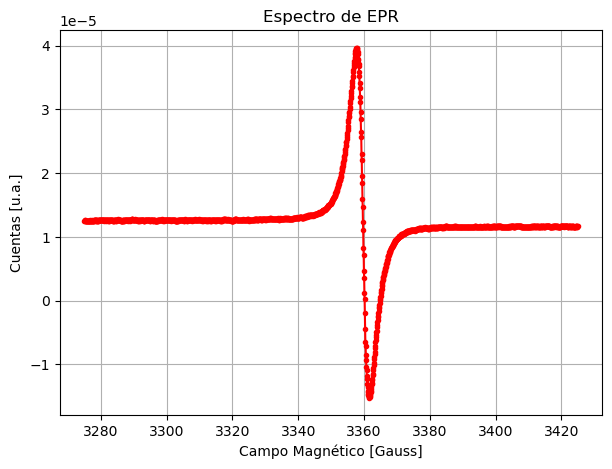

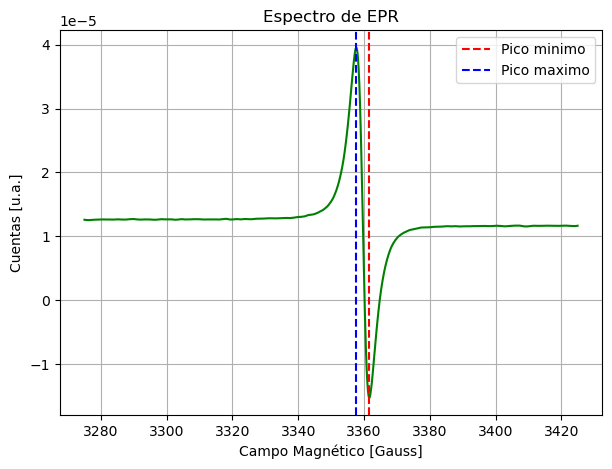

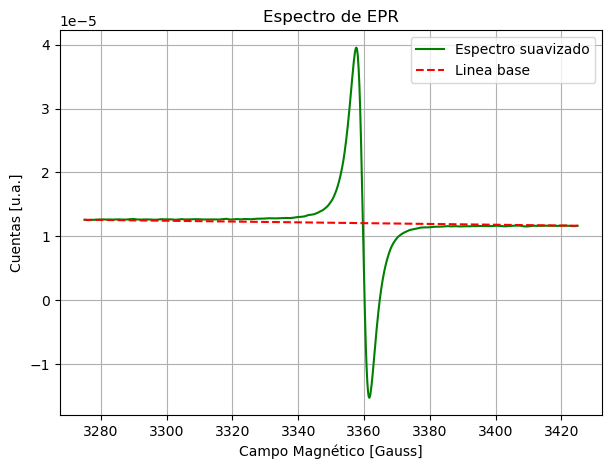

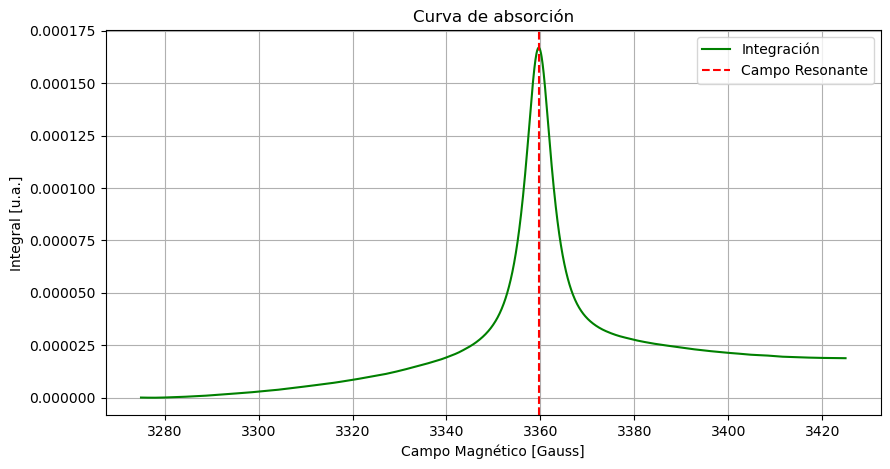

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('STRONG PITCH.dat', usecols=(2,3))
Dt=Dt[:2049]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int,  marker='.',color='r')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()
#Suavizado por Savitzky-Golay
Intsuave=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
anchopicopico=-campo_max+campo_min


plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
plt.axvline(campo_max,color='blue',linestyle='--',label='Pico maximo')
plt.legend()
plt.grid()
plt.show()
#Linea base
Pendiente=(Intsuave[-1]-Intsuave[0])/(campo_mag[-1]-campo_mag[0])
intercepto=Intsuave[0]-Pendiente*campo_mag[0]
lineabase=intercepto+(Pendiente*campo_mag)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green',label='Espectro suavizado')
plt.plot(campo_mag, lineabase, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()
#Integración por trapecio
from scipy.integrate import simpson

integ = cumtrapz(Intsuave - lineabase, campo_mag, initial=0)
maxintet=campo_mag[np.argmax(integ)]
plt.figure(figsize=(10, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.axvline(maxintet, color='red', linestyle='--', label='Campo Resonante')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()


In [34]:
v=9.43*10**9
h=6.6262*(10**-34)
A=100
g=2
be=9.27*(10**-28)
g=v*h/(maxintet*be)
#Hj=v*h/(be*g)
g

2.0063183071605404

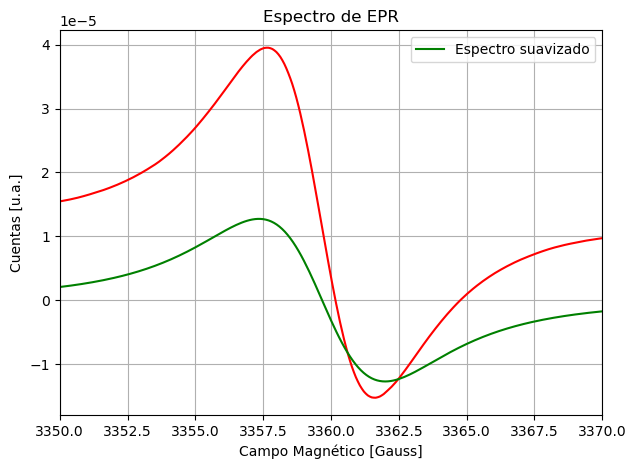

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.physics.quantum import TensorProduct
from scipy import constants

v=9.43*10**9
h=6.6262*(10**-34)
#g=2.00631
ge=2.0023
A=0*10**6

beta=9.27*(10**-28)
H1=(h*v)/(g*beta)
H2=h*((v-A)/(g*beta))
H3=h*((v+A)/(g*beta))
#Lorentziana
Hpp=campo_min-campo_max
N=4096
B=np.zeros(N)
I1=np.zeros(N)
I2=np.zeros(N)
I3=np.zeros(N)
for i in range(0,N):
    B[i]=3300+i*0.1
    I1[i]=-(1/(np.pi))*(2*Hpp*(B[i]-H1))/np.power((np.power(Hpp,2)+np.power(B[i]-H1,2)),2)*0.001
    #I2[i]=-(32*ymp*(B[i]-H2)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H2),2)))),2)
    #I3[i]=-(32*ymp*(B[i]-H3)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H3),2)))),2)
    
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'red')
plt.plot(B, I1, color = 'green',label='Espectro suavizado')
#plt.plot(B, I2, color = 'red',label='Linea base')
#plt.plot(B, I3, color = 'blue',label='Linea base')
plt.xlabel('Campo Magnético [Gauss]')
plt.xlim((3350, 3370))
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()


# Diferencias con Amplitud 

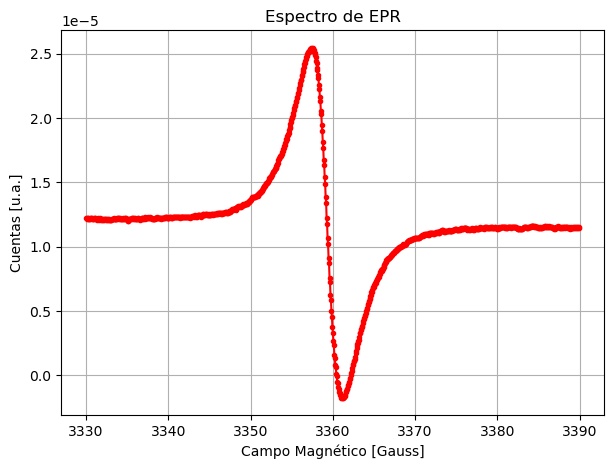

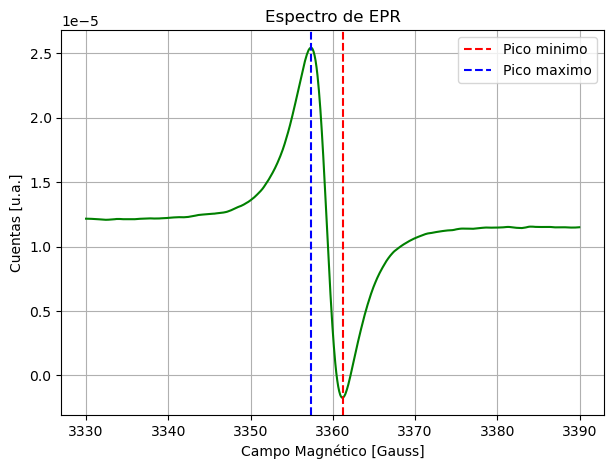

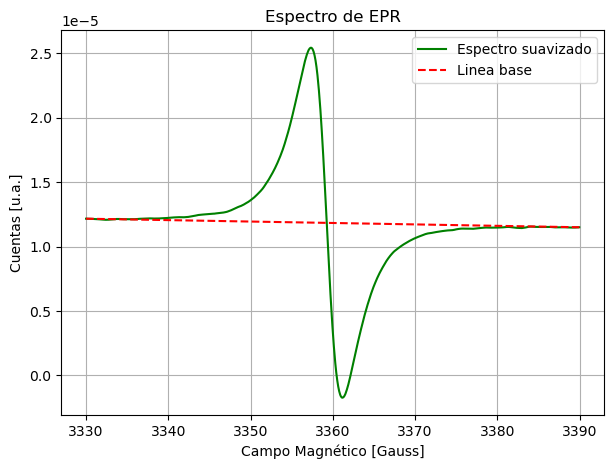

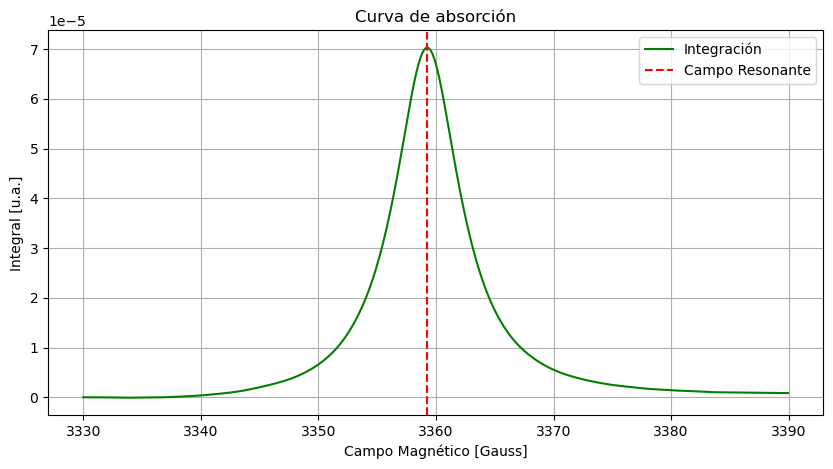

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('STRONG PITCH 3.dat', usecols=(2,3))
Dt=Dt[:1024]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int,  marker='.',color='r')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()
#Suavizado por Savitzky-Golay
Intsuave=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
anchopicopico=-campo_max+campo_min


plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
plt.axvline(campo_max,color='blue',linestyle='--',label='Pico maximo')
plt.legend()
plt.grid()
plt.show()
#Linea base
Pendiente=(Intsuave[-1]-Intsuave[0])/(campo_mag[-1]-campo_mag[0])
intercepto=Intsuave[0]-Pendiente*campo_mag[0]
lineabase=intercepto+(Pendiente*campo_mag)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green',label='Espectro suavizado')
plt.plot(campo_mag, lineabase, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()
#Integración por trapecio
from scipy.integrate import simpson

integ = cumtrapz(Intsuave - lineabase, campo_mag, initial=0)
maxintet=campo_mag[np.argmax(integ)]
plt.figure(figsize=(10, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.axvline(maxintet, color='red', linestyle='--', label='Campo Resonante')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()


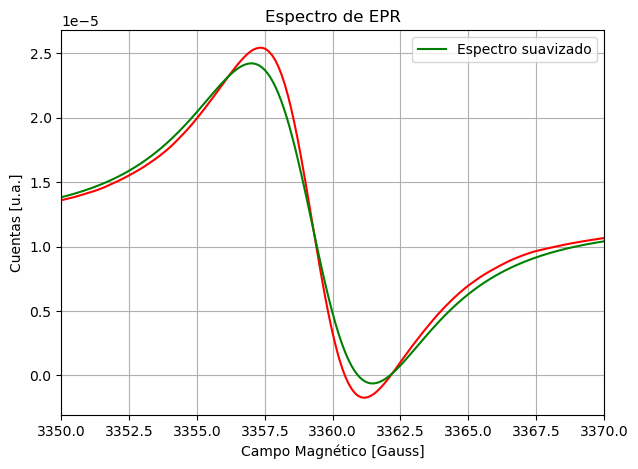

In [9]:
v=9.43*10**9
h=6.6262*(10**-34)
A=100
g=2
be=9.27*(10**-28)
g=v*h/(maxintet*be)
#Hj=v*h/(be*g)
g
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.physics.quantum import TensorProduct
from scipy import constants

v=9.43*10**9
h=6.6262*(10**-34)
#g=2.00631
ge=2.0023
A=0*10**6

beta=9.27*(10**-28)
H1=(h*v)/(g*beta)
H2=h*((v-A)/(g*beta))
H3=h*((v+A)/(g*beta))
#Lorentziana
Hpp=campo_min-campo_max
N=4096
B=np.zeros(N)
I1=np.zeros(N)
I2=np.zeros(N)
I3=np.zeros(N)
for i in range(0,N):
    B[i]=3300+i*0.1
    I1[i]=-(1/(np.pi))*(2*Hpp*(B[i]-H1))/np.power((np.power(Hpp,2)+np.power(B[i]-H1,2)),2)*0.0009+(1.18*10**-5)
    
    #I2[i]=-(32*ymp*(B[i]-H2)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H2),2)))),2)
    #I3[i]=-(32*ymp*(B[i]-H3)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H3),2)))),2)
    
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'red')
plt.plot(B, I1, color = 'green',label='Espectro suavizado')
#plt.plot(B, I2, color = 'red',label='Linea base')
#plt.plot(B, I3, color = 'blue',label='Linea base')
plt.xlabel('Campo Magnético [Gauss]')
plt.xlim((3350, 3370))
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()

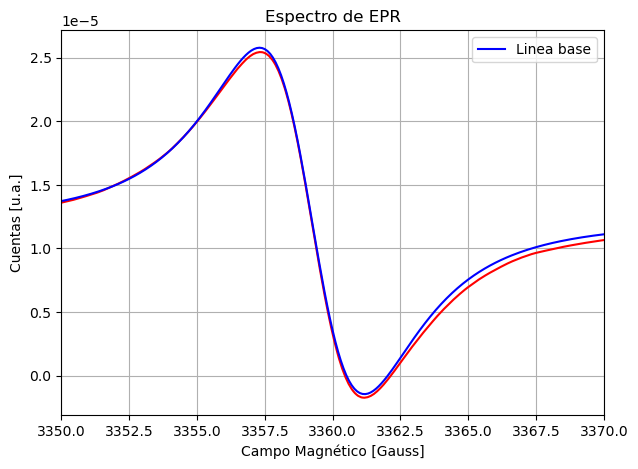

1.2165544944386575e-05

In [18]:
maxiantet=integ[np.argmax(integ)]
ym=maxiantet
ymp=3*ym/(4*Hpp)
B1=np.zeros(N)
I2=np.zeros(N)
v=9.43*10**9
h=6.6262*(10**-34)
#g=2.00631
ge=2.0023
A=0*10**6
beta=9.27*(10**-28)
H1=(h*v)/(g*beta)
offset=lineabase[np.argmax(lineabase)]
for i in range(0,N):
    B1[i]=3300+i*0.1
    I2[i]=-(32*ymp*(B[i]-H1)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H1),2)))),2)+offset
       
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'red')
#plt.plot(B, I1, color = 'green',label='Espectro suavizado')
plt.plot(B, I2, color = 'blue',label='Linea base')
#plt.plot(B, I3, color = 'blue',label='Linea base')
plt.xlabel('Campo Magnético [Gauss]')
plt.xlim((3350, 3370))
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show() 
offset

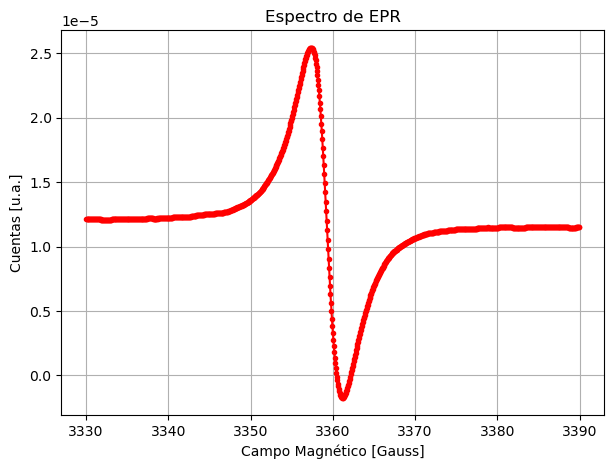

2.544886751153725e-05

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('STRONG PITCH 3.dat', usecols=(2,3))
Dt=Dt[:1024]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
Int=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
Hpp=-campo_max+campo_min
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int,  marker='.',color='r')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()
#Suavizado por Savitzky-Golay
maxi

# Dataclasses


In [77]:
from typing import Union, Any
from dataclasses import dataclass
from dataclasses import replace as rp
import numpy as np

@dataclass
class Hval:
    s: float = 1/2   # Spin
    g: Union[np.array, float] = 2.003 # g value
    I: float = 0.0   # Nuclear spin
    A: Union[np.array, float] = 0.0     # Hyperfine constant
    Q: Union[np.array, float] = 0.0     # Quadrupole interaction constant
    D: Any = 0.0 
    Hppg: float = 0.0
    Hppl: float = 0.0
    HppV: Any = 0.0    

@dataclass
class Eco:
    Freq: float = 9.433
    Points: int = 4096
    Temperature: float= 273.15
    ModAmp: float = 1.0
    Centerswp: Any = 0.0
    
    
Ina= Hval()
Exp = Eco()
Ina.g =np.array([2.003, 2 ,3])
print(Ina.g)
#Ina = rp(Ina, g=25)
Exp.Centerswp=[300, 30]
Exp

[2.003 2.    3.   ]


Eco(Freq=9.433, Points=4096, Temperature=273.15, ModAmp=1.0, Centerswp=[300, 30])